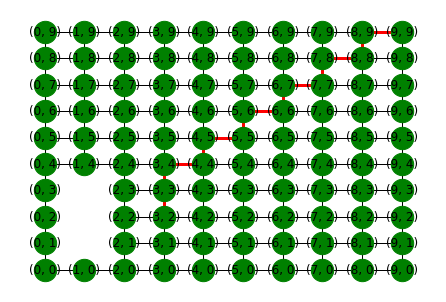

In [3]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def heuristic(a, b):
    # return abs(b[0] - a[0]) + abs(b[1] - a[1])
    # make the heuristic be the euclidean distance
    return ((b[0] - a[0])**2 + (b[1] - a[1])**2)**0.5

def astar(graph, start, goal):
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = dict()
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal)

    while open_list:
        current = heapq.heappop(open_list)[1]

        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + 1

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

# Create a graph
graph = nx.grid_2d_graph(10, 10)
graph.remove_node((1, 1))
graph.remove_node((1, 2))
graph.remove_node((1, 3))

start = (3, 2)
goal = (9, 9)

# Run A* search
path = astar(graph, start, goal)

# Visualize the graph
pos = {(x, y): (x, y) for x, y in graph.nodes()}
nx.draw(graph, pos, node_color="g", node_size=500, with_labels=True)

# Visualize the path
if path is not None:
    edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color='r', width=3)

plt.show()

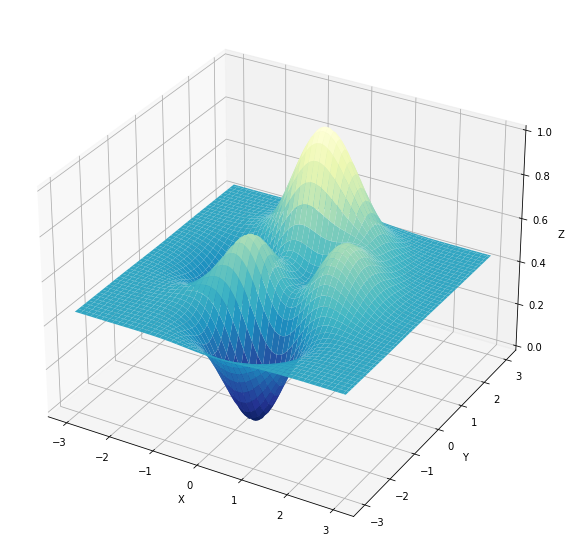

In [9]:
# generate a cool looking 3d plot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# I want the surface to look bumpy and have ridges like a non convex loss function
# so I'll use a sum of sine waves

# make it look like matlab peaks(25) function
# https://www.mathworks.com/help/matlab/ref/peaks.html
def peaks(x, y):
    return 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
        - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
        - 1/3*np.exp(-(x+1)**2 - y**2)

# make the grid
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# calculate the Z values for each of the (X, Y) grid points
Z = peaks(X, Y)




# scale it to fit in the range [0, 1]
Z = (Z - Z.min()) / (Z.max() - Z.min())




# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



plt.show()



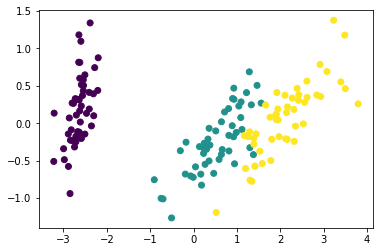

In [1]:
# create a pca plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# fit a PCA model to the data
pca = PCA(n_components=2)
pca.fit(X)

# transform the data to the new basis
X_transformed = pca.transform(X)

# plot the data in the new basis
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.show()


3.8120749221836667
2.4060374610918336
1.0


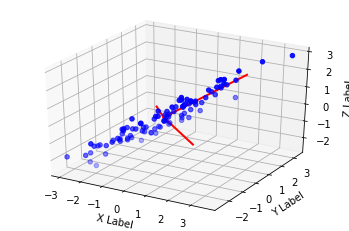

In [95]:
import numpy as np

# Generate structured 3D data
num_points = 100
x = np.random.normal(0, 1, num_points)
y = np.random.normal(0, 1, num_points)
z = np.random.normal(0, 1, num_points)

# Rotate the data using a random rotation matrix
rotation_matrix = np.random.rand(3, 3)
data = np.dot(np.vstack((x, y, z)).T, rotation_matrix)

# Perform PCA
pca = PCA(n_components=3)
pca.fit(data)

# Calculate PCA lines
mean = pca.mean_
components = pca.components_
lengths = pca.explained_variance_

# make any length less than 1 be 1 so we can plot it, but make sure
# the middle length is exactly in between the other two lengths
lengths[lengths < 1] = 1
lengths[1] = (lengths[0] + lengths[2]) / 2


for e in lengths:
    print(e)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')

# Plot PCA lines
scale_factor = 1
for component, length in zip(components, lengths):
    start = mean
    end = mean + component * length * scale_factor
    ax.plot(*zip(start, end), color='r', linewidth=2)

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the 3D plot
plt.show()

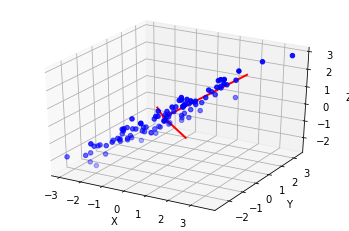

<Figure size 432x288 with 0 Axes>

In [107]:
lens = [3.8120749221836667, 1.8, 0.9]

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='b', marker='o')

# Plot PCA lines
scale_factor = 1
for component, length in zip(components, lens):
    start = mean
    end = mean + component * length * scale_factor
    ax.plot(*zip(start, end), color='r', linewidth=2)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the 3D plot
plt.show()
# save the plot. right now its just white
plt.savefig('pca.png', dpi=300, bbox_inches='tight')


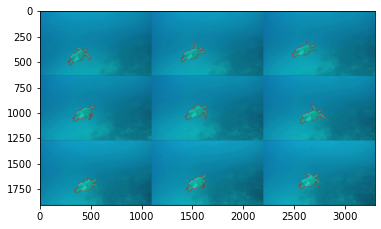

In [12]:
# a function that takes a video and returns 9 frames from it
# that are evenly spaced out. The first and last frame are always
# included
import cv2
import numpy as np

def get_video_frames(video_path, num_frames=9):

    # Initialize the video capture object
    cap = cv2.VideoCapture(video_path)

    # Check if the video is opened successfully
    if not cap.isOpened():
        print("Error: Could not open the video file.")
        return []

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the frame indices to extract
    frame_indices = np.linspace(1, total_frames - 1, num=num_frames, dtype=int)

    # Initialize the output list
    output_frames = []

    # Loop through the frame indices and extract the corresponding frames
    for frame_idx in frame_indices:
        # Set the current position of the video to the desired frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)

        # Read the current frame
        ret, frame = cap.read()

        # Check if the frame was read successfully
        if not ret:
            print(f"Error: Could not read frame {frame_idx}.")
            continue

        # Append the current frame to the output list
        output_frames.append(frame)

    # Release the video capture object
    cap.release()

    return output_frames

# get the frames
frames = get_video_frames('Rotobrush Media.mp4')

import cv2
import numpy as np

# Get the shape of the individual frames
height, width, channels = frames[0].shape

# Create an empty array to store the final image
final_image = np.zeros((height * 3, width * 3, channels), dtype=np.uint8)

# Fill the final image with the frames
for i in range(3):
    for j in range(3):
        final_image[i * height : (i + 1) * height, j * width : (j + 1) * width] = frames[i * 3 + j]

# display the final image using matplotlib
import matplotlib.pyplot as plt

final_image = final_image[:, :, ::-1]
plt.imshow(final_image)

# save the final image using matplotlib
plt.imsave('final_image.png', final_image)


# # save the frames as pngs, called turtle1.png, turtle2.png, etc. wihtout using cv2
# for i, frame in enumerate(frames):
#     cv2.imwrite(f'turtle{i}.png', frame)


# # show the frames using matplotlib
# import matplotlib.pyplot as plt

# for frame in frames:
#     plt.imshow(frame[:, :, ::-1])
#     plt.show()


